In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('russia_losses_personnel.csv')
df.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        91 non-null     object
 1   day         91 non-null     int64 
 2   personnel   91 non-null     int64 
 3   personnel*  91 non-null     object
 4   POW         91 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 3.7+ KB


In [4]:
df.loc[df['personnel*'] != 'about', 'personnel*'].count()

6

In [5]:
df.loc[df['personnel*'] == 'about', 'personnel*'].count()

85

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['date day'] = pd.DatetimeIndex(df.date).day
df['month'] = pd.DatetimeIndex(df.date).month

In [8]:
df.head()

,date,day,personnel,personnel*,POW,date day,month
0,2022-02-25,2,2800,about,0,25,2
1,2022-02-26,3,4300,about,0,26,2
2,2022-02-27,4,4500,about,0,27,2
3,2022-02-28,5,5300,about,0,28,2
4,2022-03-01,6,5710,about,200,1,3


Text(0, 0.5, 'Number of Losses')

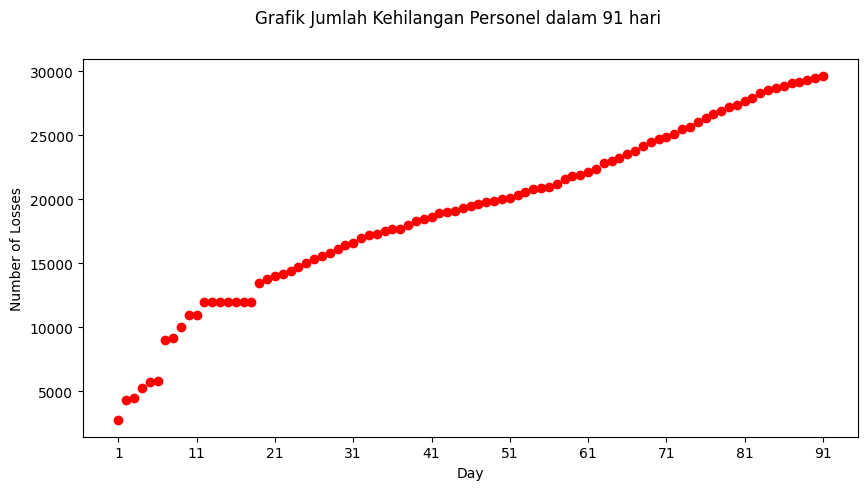

In [9]:
fig = plt.figure(figsize = (10,5), dpi = 100)
x = np.arange
plt.scatter(x = np.arange(1,92), y = df['personnel'], c = 'red')
plt.xticks(np.arange(1,92, step = 10))
for txt in fig.texts:
    txt.set_visible(False)
fig.suptitle('Grafik Jumlah Kehilangan Personel dalam 91 hari')
plt.xlabel('Day')
plt.ylabel('Number of Losses')

Text(0, 0.5, 'Number of Losses')

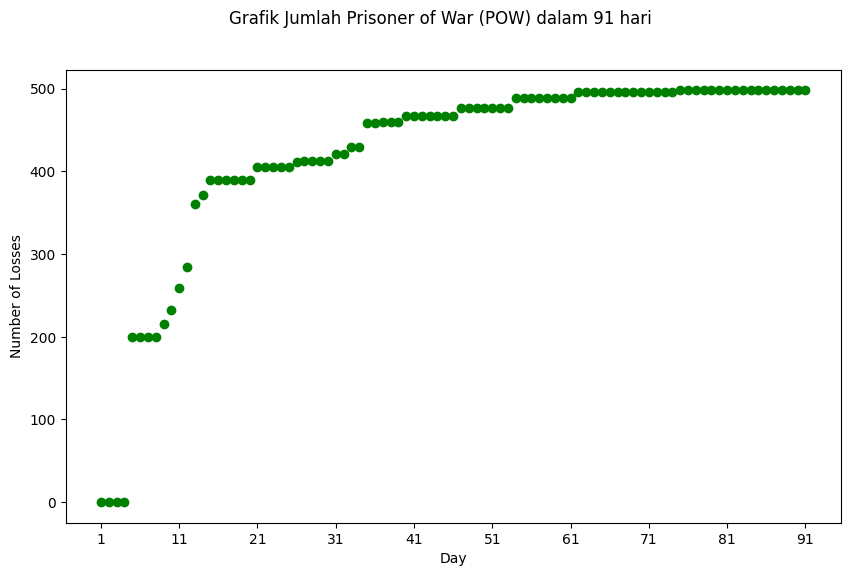

In [10]:
fig = plt.figure(figsize = (10,6), dpi = 100)
x = np.arange
plt.scatter(x = np.arange(1,92), y = df['POW'], c = 'green')
plt.xticks(np.arange(1,92, step = 10))
for txt in fig.texts:
    txt.set_visible(False)
fig.suptitle('Grafik Jumlah Prisoner of War (POW) dalam 91 hari')
plt.xlabel('Day')
plt.ylabel('Number of Losses')

In [11]:
# Drop Date and Personnel* Column
df.drop(['date','personnel*'], axis = 1, inplace = True)

In [12]:
from sklearn import preprocessing
column_names = df.columns.to_list()
normal = preprocessing.normalize(df)
normalized_df = pd.DataFrame(normal, columns = column_names)
normalized_df.head()

,day,personnel,POW,date day,month
0,0.000714,0.999960,0.000000,0.008928,0.000714
1,0.000698,0.999981,0.000000,0.006046,0.000465
2,0.000889,0.999982,0.000000,0.006000,0.000444
3,0.000943,0.999986,0.000000,0.005283,0.000377
4,0.001050,0.999386,0.035005,0.000175,0.000525


In [13]:
normalized_df.to_csv('normalize_losses_personnel', index=False)